In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import sidetable
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

In [2]:
df = pd.read_csv("datos/bikes.csv", index_col=0)
df.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606


In [3]:
lista_columnas = ["instant", "registered", "cnt"]

In [4]:
df.drop(columns= lista_columnas, inplace=True)

In [5]:
def explorar_df(dataframe, nombre = ''):
    """Esta función realiza la exploración inicial de un dataframe dado:
            - Muestra las 5 primeras filas
            - Muestra las 5 últimas filas
            - Muestra 10 filas aleatorias
            - Indica el nº de filas y columnas
            - Muestra el resultado del método .info()
            - Indica el número de nulos por columna en valor absoluto y porcentaje
            - Indica el nº de filas duplicadas. En caso de que no pueda realizar la comprobación muestra un error
            - Muestra los principales estadísticos tanto de las columnas numéricas (si las hay) como de las categóricas (si las hay)
            - Muestra el nombre de las columnas
            - Indica el numero de valores distintos de cada columna y muestra los valores cuando sean 15 o menos
        Parámetros:
            - dataframe (pandas.core.frame.DataFrame): dataframe que se requiere explorar
            - nombre (str): nombre del dataframe a explorar. Parámetro por defecto con valor '' para que si n o se le quiere poner un nombre al dataframe
              la exploración pueda continuar.
        Return: None.
    """
    print(f'EXPLORACIÓN DEL DATAFRAME {nombre.upper()}')
    print('---------------------------------------------------------------------------')
    print(f'Las primeras 5 filas del dataframe {nombre} son:')
    display(dataframe.head())
    print('---------------------------------------------------------------------------')
    print(f'Las últimas 5 filas del dataframe {nombre} son:')
    display(dataframe.tail())
    print('---------------------------------------------------------------------------')
    print(f'A comntinuación se muestran 10 filas aleatorias del dataframe {nombre}:')
    display(dataframe.sample(10))
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas')
    print('---------------------------------------------------------------------------')
    print('A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:')
    dataframe.info()
    print('---------------------------------------------------------------------------')
    print('El número de nulos por columna en valor absoluto y porcentaje es:')
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f'{dataframe.isnull().sum().index[i]}: nº de nulos: {col}. % de nulos: {round(col/dataframe.shape[0]*100, 2)} %')
    print('---------------------------------------------------------------------------')
    try:
        print(f'El nº de filas duplicadas del dataframe {nombre} es: {df.duplicated().sum()}')
    except:
        print(f'Ha ocurrido un error. No se ha podido comprobar si el dataframe {nombre} tiene filas duplicdas')
    print('---------------------------------------------------------------------------')
    if dataframe.select_dtypes(include=np.number).shape[1] != 0:
        print(f'Los principales estadísticos de las columnas numéricas son:')
        display(dataframe.describe().T)
    print('---------------------------------------------------------------------------')
    if dataframe.select_dtypes(exclude=np.number).shape[1] != 0:
        print(f'Los principales estadísticos de las columnas categóricas son:')
        display(dataframe.describe(include=object).T)
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene las siguientes columnas: \n{dataframe.columns}')
    print('---------------------------------------------------------------------------')
    print('El numero de valores distintos de cada columna es:')
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 15:
            print(f'{col}: {len(dataframe[col].value_counts())}')
        else:
            print(f'{col}: {len(dataframe[col].value_counts())}')
            print(f'Los valores únicos de la columna “{col}” son: {dataframe[col].unique()}')

In [6]:
explorar_df(df, "bikes")

EXPLORACIÓN DEL DATAFRAME BIKES
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe bikes son:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe bikes son:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
725,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247
726,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644
727,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159
728,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364
729,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe bikes:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
712,14-12-2019,winter,1,12,0,5,1,1,11.548347,14.70960,64.2917,8.792343,429
516,01-06-2019,summer,1,6,0,5,1,2,26.820847,30.39810,75.5417,15.916721,533
466,12-04-2019,summer,1,4,0,4,1,1,16.297500,19.38020,46.6250,19.458743,663
114,25-04-2018,summer,0,4,0,1,1,1,24.873347,28.72500,77.6667,12.417311,773
355,22-12-2018,spring,0,12,0,4,1,2,17.356653,21.30605,75.7500,3.167425,227
634,27-09-2019,winter,1,9,0,4,1,2,26.650000,30.39875,69.0833,9.000914,751
214,03-08-2018,autumn,0,8,0,3,1,2,29.998347,33.99685,65.7500,9.084061,467
299,27-10-2018,winter,0,10,0,4,1,2,19.270000,22.85230,81.2917,13.250121,240
380,16-01-2019,spring,1,1,1,1,0,1,7.790000,9.53315,52.2500,15.500986,217
683,15-11-2019,winter,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,320


---------------------------------------------------------------------------
El dataframe bikes tiene 730 filas y 13 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-nu

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


---------------------------------------------------------------------------
El dataframe bikes tiene las siguientes columnas: 
Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual'],
      dtype='object')
---------------------------------------------------------------------------
El numero de valores distintos de cada columna es:
dteday: 730
season: 4
Los valores únicos de la columna “season” son: ['spring' 'summer' 'autumn' 'winter']
yr: 2
Los valores únicos de la columna “yr” son: [0 1]
mnth: 12
Los valores únicos de la columna “mnth” son: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: 2
Los valores únicos de la columna “holiday” son: [0 1]
weekday: 7
Los valores únicos de la columna “weekday” son: [6 0 1 2 3 4 5]
workingday: 2
Los valores únicos de la columna “workingday” son: [0 1]
weathersit: 3
Los valores únicos de la columna “weathersit” son: [2 1 3]
temp: 498
atemp: 689
hum: 594
windspeed:

In [7]:
columnas_numericas = ["weathersit", "temp", "atemp", "hum", "windspeed", "casual"]

# Detectamos outliers

In [8]:
columnas_numericas2 = ["weathersit", "temp",  "hum", "windspeed"]

In [9]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [10]:
ind = detectar_outliers(columnas_numericas2, df)

In [11]:
print(ind)
valores = ind.values()
print(valores)
valores = {indice for sublista in valores for indice in sublista}
print(valores)

{'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}
dict_values([[49, 68], [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]])
{449, 382, 68, 292, 420, 44, 431, 432, 49, 720, 407, 665, 93, 94}


In [12]:
len(valores)

14

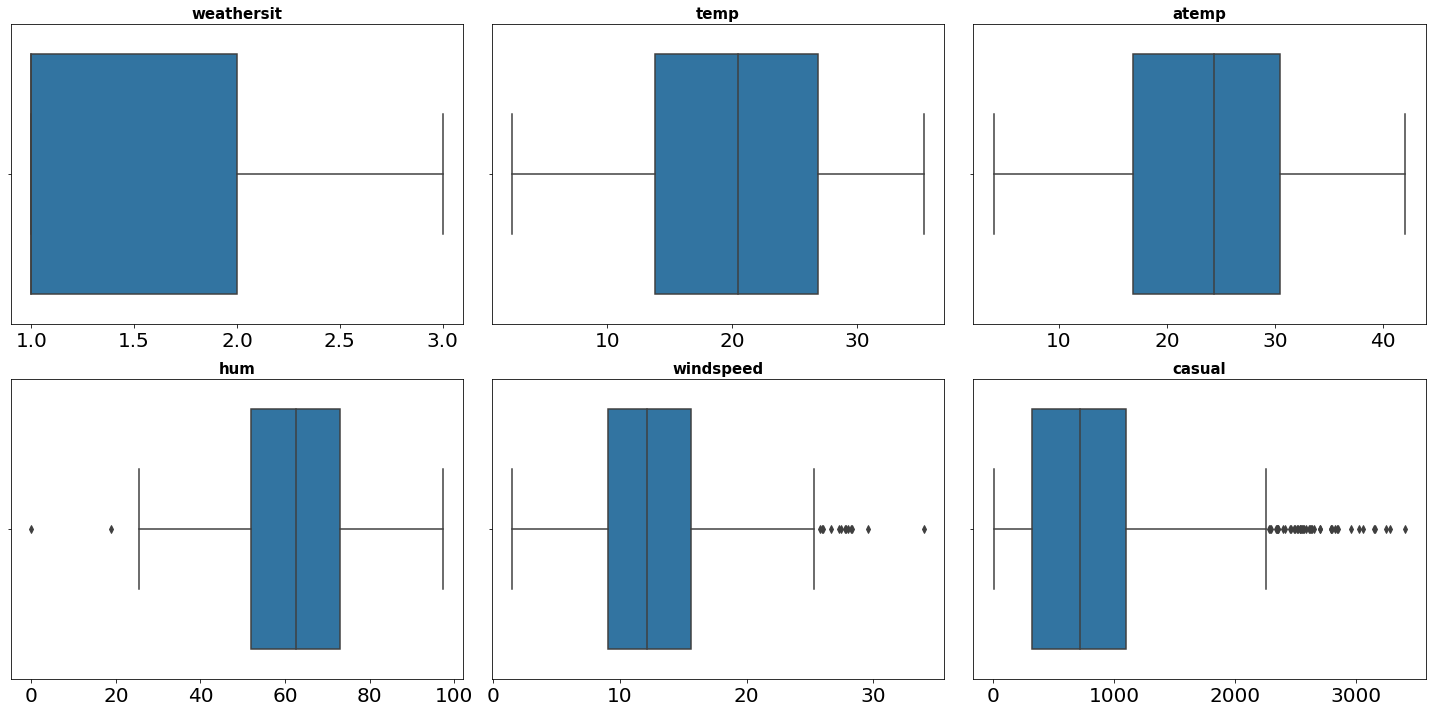

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
axes = axes.flat
for i, colum in enumerate(columnas_numericas):
    sns.boxplot(data = df,
                x = colum,
                ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

In [14]:
lista_festivos = ['01-01-2018', '01-01-2019', '19-02-2018', '18-02-2019', '15-01-2018', '21-01-2019', 
                  '16-04-2018', '16-04-2019', '28-05-2018', '27-05-2019', '04-07-2018', '04-07-2019',
                  '03-09-2018', '02-09-2019', '08-09-2018', '14-09-2019', '12-11-2018', '11-11-2019',
                  '22-11-2018', '28-11-2019', '25-12-2018', '25-12-2019']

In [15]:
def festivos (fecha):
    
    if fecha in lista_festivos:
        return 1
    
    else:
        return 0
    
df['holiday'] = df['dteday'].apply(festivos)

In [16]:
df['dteday'] = pd.to_datetime(df['dteday'], format = '%d-%m-%Y')

In [17]:
mapa_estaciones = {
    'spring':'winter',
    'winter': 'autumn',
    'autumn': 'summer',
    'summer':'spring'
}

In [18]:
df["season"] = df["season"].map(mapa_estaciones, na_action="ignore")

In [19]:
df["weekday"] = df["dteday"].dt.day_name()

In [20]:
def working (col1, col2): 
    
    
    if col1 in ["Saturday", "Sunday"] or col2 == 1:
        return  0
    else:
        return 1
    
df['workingday'] = df.apply(lambda x: working(x['weekday'], x['holiday']), axis= 1)

In [21]:
df_numericas = df.select_dtypes(include = np.number )

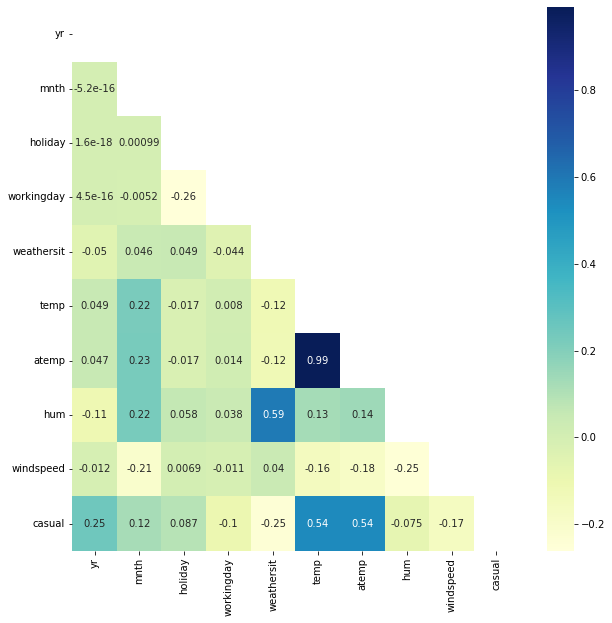

In [22]:
plt.figure(figsize= (10,10)) 
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=np.bool_))
sns.heatmap(df_numericas.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True);

In [23]:
df.drop('atemp', axis = 1, inplace = True)

In [24]:
lista_categoricas = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

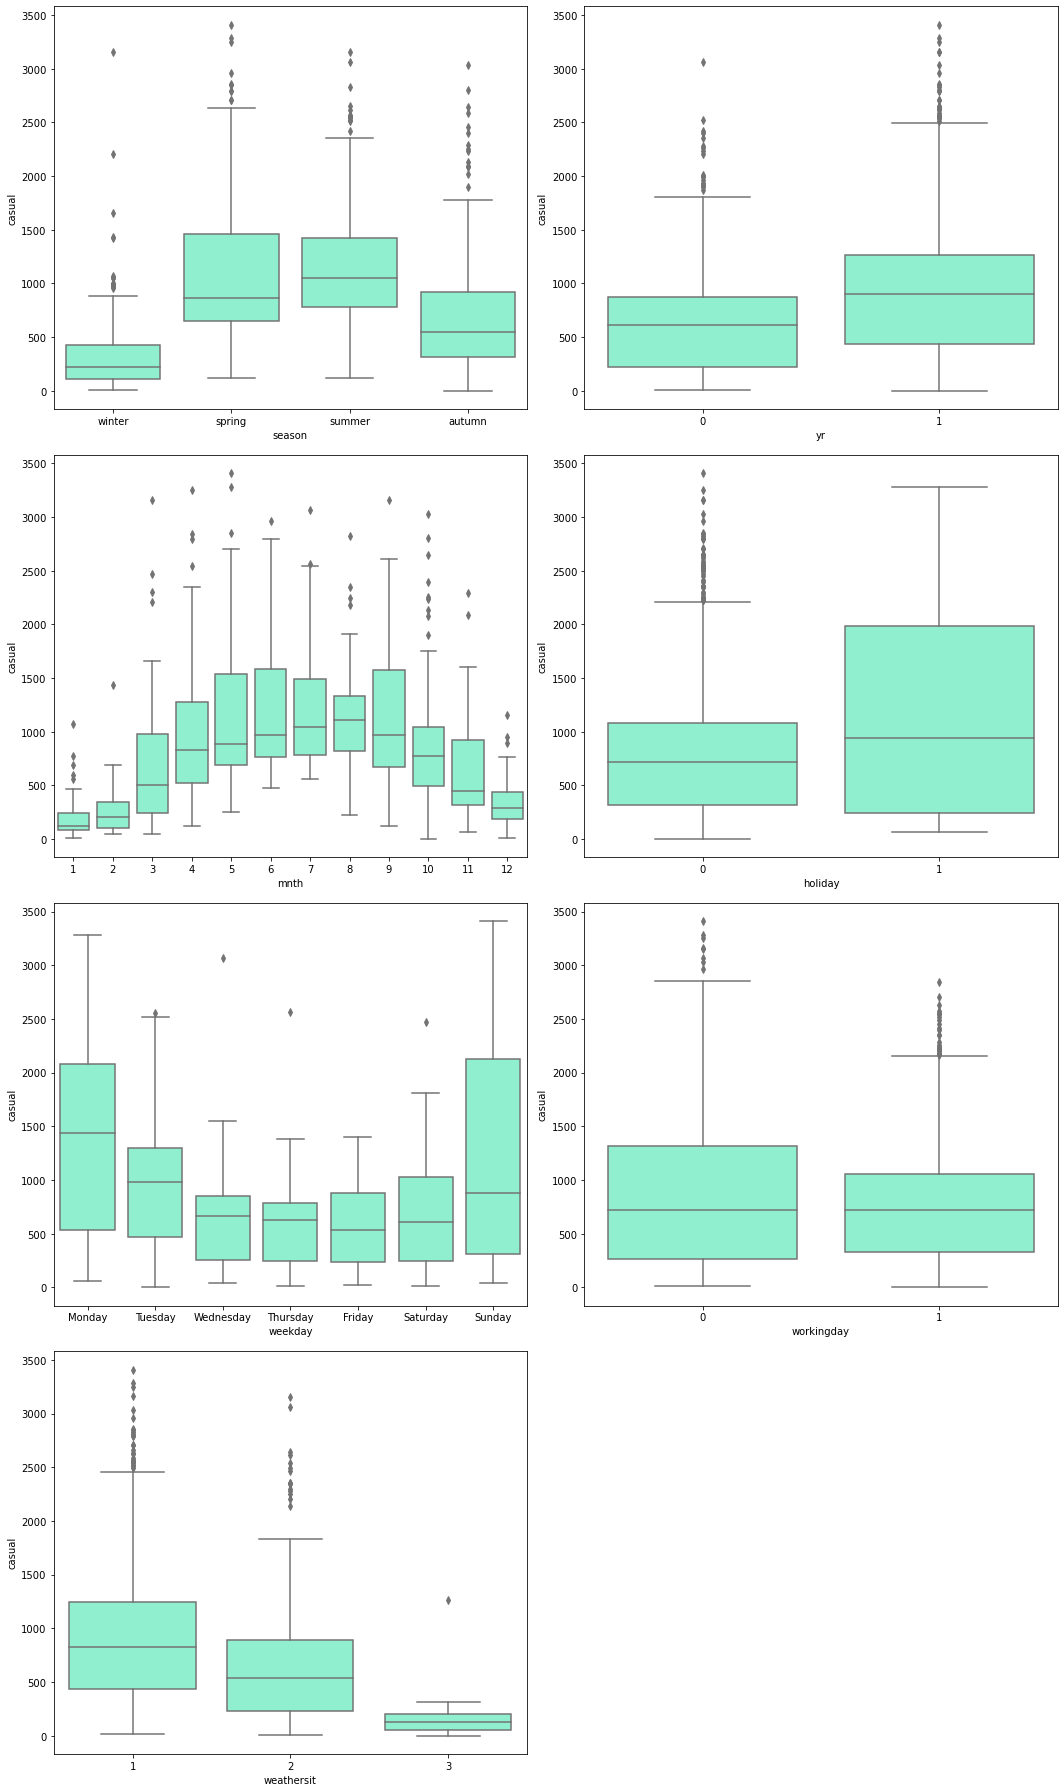

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_categoricas):
    sns.boxplot(x = columna, y = 'casual' , data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [27]:
df.to_csv("datos/bikes_EDA_casual.csv")